In [1]:
import os
import sys
import importlib
os.chdir("../..")
directory_path = os.path.abspath(os.path.join("src"))
if directory_path not in sys.path:
    sys.path.append(directory_path)

import EyeTraumaAnalysis

In [2]:
importlib.reload(EyeTraumaAnalysis);

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import cv2

In [4]:
image = EyeTraumaAnalysis.Image("data/01_raw/11000.jpg")
image = cv2.cvtColor(image.img, cv2.COLOR_BGR2RGB) # Change color to RGB (from BGR)
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
# Convert to float type only for supporting cv2.kmean
pixel_vals = np.float32(pixel_vals)

In [5]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) #criteria
k = 10 # Choosing number of cluster
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

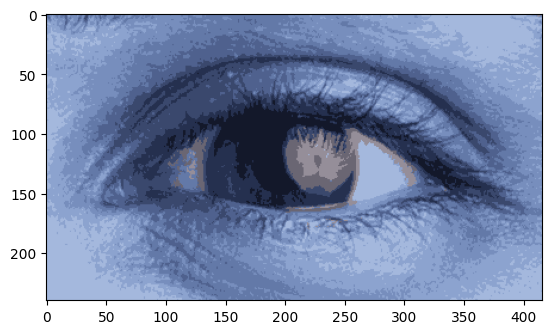

In [6]:
centers = np.uint8(centers) # convert data into 8-bit values
segmented_data = centers[labels.flatten()] # Mapping labels to center points( RGB Value)
segmented_image = segmented_data.reshape((image.shape)) # reshape data into the original image dimensions
plt.imshow(segmented_image)

In [10]:
segmented_data[10]

array([ 99, 121, 168], dtype=uint8)

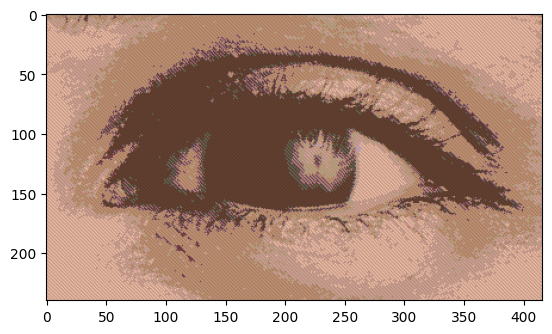

In [28]:
image = EyeTraumaAnalysis.Image("data/01_raw/11000.jpg")
img = image.img
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 10
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.imshow(res2)